### Importing the necessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

# import packages for clustering

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# center and scale the data

from sklearn.preprocessing import StandardScaler

C:\Users\Dell\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Importing the dataset in Jupyter Notebook

In [3]:
DA = pd.read_csv('CC GENERAL.csv')

In [4]:
DA.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
DA.shape

(8950, 18)

**There are 8950 rows and 18 variables.**

In [6]:
DA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
DA.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Missing Value Treatment

In [8]:
DA.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
DA['MINIMUM_PAYMENTS']

0        139.509787
1       1072.340217
2        627.284787
3               NaN
4        244.791237
           ...     
8945      48.886365
8946            NaN
8947      82.418369
8948      55.755628
8949      88.288956
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: float64

In [10]:
DA['MINIMUM_PAYMENTS'].value_counts()

MINIMUM_PAYMENTS
299.351881    2
342.286490    1
184.464721    1
276.486072    1
309.140865    1
             ..
181.773223    1
711.894455    1
256.522546    1
127.799107    1
88.288956     1
Name: count, Length: 8636, dtype: int64

In [11]:
DA['CREDIT_LIMIT'] = DA.CREDIT_LIMIT.fillna(DA['CREDIT_LIMIT'].median())

In [12]:
DA.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [14]:
DA['MINIMUM_PAYMENTS'].value_counts().head()

MINIMUM_PAYMENTS
299.351881    2
342.286490    1
184.464721    1
276.486072    1
309.140865    1
Name: count, dtype: int64

In [15]:
DA['MINIMUM_PAYMENTS'] = DA.MINIMUM_PAYMENTS.fillna(DA['MINIMUM_PAYMENTS'].median())

In [16]:
DA.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [17]:
DA.duplicated().sum()

0

In [18]:
DA_copy = DA.copy()

In [19]:
DA_copy = DA_copy.drop(columns=['CUST_ID'])

In [20]:
DA_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
#standardize the data
sc = StandardScaler()
DA_copy_scaled = sc.fit_transform(DA_copy)
DA_copy_scaled = pd.DataFrame(DA_copy)
DA_copy_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [22]:
DA_copy_scaled.shape

(8950, 17)

In [23]:
#You can also use this simple code
DA_copy_scaled = DA_copy.apply(stats.zscore)

# Feature Engineering

## Dimenasionality Reduction

### PCA : Principle Component Analysis

**Because y variable is not present so we cannot do correlational analysis to do feature engineering or Dimenasionality Reduction, here in unsupervised ML algorithms, PCA Principle Component Analysis is used.**

In [24]:
DA_copy_scaled.shape

(8950, 17)

In [25]:
pc = PCA(n_components = 17).fit(DA_copy_scaled)

In [26]:
pc.explained_variance_     # eigen values

array([4.64112269e+00, 3.45372843e+00, 1.49840831e+00, 1.27166123e+00,
       1.05832222e+00, 9.75918638e-01, 8.30275112e-01, 7.30946222e-01,
       6.45776132e-01, 5.23658895e-01, 4.03327742e-01, 3.01506526e-01,
       2.42762789e-01, 2.06899443e-01, 1.72172632e-01, 4.54009954e-02,
       1.16501572e-05])

In [27]:
#eigen values
sum(pc.explained_variance_)

17.001899653592584

In [28]:
pc.explained_variance_ /  sum(pc.explained_variance_)

array([2.72976713e-01, 2.03137796e-01, 8.81318170e-02, 7.47952439e-02,
       6.22472925e-02, 5.74005645e-02, 4.88342555e-02, 4.29920325e-02,
       3.79825870e-02, 3.08000227e-02, 2.37225104e-02, 1.77336964e-02,
       1.42785685e-02, 1.21691956e-02, 1.01266703e-02, 2.67034839e-03,
       6.85226796e-07])

In [29]:
#amount of variance that each PC explains
pc.explained_variance_ratio_

array([2.72976713e-01, 2.03137796e-01, 8.81318170e-02, 7.47952439e-02,
       6.22472925e-02, 5.74005645e-02, 4.88342555e-02, 4.29920325e-02,
       3.79825870e-02, 3.08000227e-02, 2.37225104e-02, 1.77336964e-02,
       1.42785685e-02, 1.21691956e-02, 1.01266703e-02, 2.67034839e-03,
       6.85226796e-07])

In [30]:
var = np.round(np.cumsum(pc.explained_variance_ratio_) * 100, 2)
var

array([ 27.3 ,  47.61,  56.42,  63.9 ,  70.13,  75.87,  80.75,  85.05,
        88.85,  91.93,  94.3 ,  96.08,  97.5 ,  98.72,  99.73, 100.  ,
       100.  ])

In [31]:
pd.DataFrame({'Eigen_Values':pc.explained_variance_,
                   'VAR':np.round(pc.explained_variance_ratio_*100,2),
                     'CUM_VAR':var},index=range(1,18))

,Eigen_Values,VAR,CUM_VAR
1,4.641123,27.30,27.30
2,3.453728,20.31,47.61
3,1.498408,8.81,56.42
4,1.271661,7.48,63.90
5,1.058322,6.22,70.13
6,0.975919,5.74,75.87
7,0.830275,4.88,80.75
8,0.730946,4.30,85.05
9,0.645776,3.80,88.85
10,0.523659,3.08,91.93


In [32]:
pc_final=PCA(n_components=6).fit(DA_copy_scaled)

In [33]:
pc_final

PCA(n_components=6)

In [34]:
pc_final.explained_variance_

array([4.64112269, 3.45372843, 1.49840831, 1.27166123, 1.05832222,
       0.97591864])

In [35]:
DA_copy_scaled.shape

(8950, 17)

In [36]:
reduced_cr=pc_final.transform(DA_copy_scaled)

In [37]:
dimensions=pd.DataFrame(reduced_cr)

In [38]:
dimensions.shape

(8950, 6)

In [39]:
dimensions.columns=['C1','C2','C3','C4','C5','C6']

In [40]:
pd.DataFrame(DA_copy_scaled).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


In [41]:
dimensions.head()

,C1,C2,C3,C4,C5,C6
0,-1.683649,-1.072241,0.475660,0.679928,0.043195,0.068069
1,-1.134085,2.509150,0.602216,-0.109542,0.662638,-1.102255
2,0.969395,-0.383577,0.090970,1.238359,-2.166584,-0.320185
3,-0.888220,0.004648,1.499800,1.075271,0.225828,-0.171540
4,-1.600021,-0.683795,0.347927,1.013642,-0.453816,0.077004


## Clusterings

In [42]:
dimensions.shape

(8950, 6)

In [43]:
km_3 = KMeans(n_clusters = 3, random_state = 123).fit(dimensions)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [44]:
km_3.labels_

array([2, 1, 2, ..., 2, 2, 2])

In [45]:
km_3

KMeans(n_clusters=3, random_state=123)

In [46]:
y = pd.DataFrame(km_3.labels_)

In [47]:
y

,0
0,2
1,1
2,2
3,2
4,2
5,2
6,0
7,2
8,2
9,2


In [48]:
dimensions.shape

(8950, 6)

In [49]:
y.shape

(8950, 1)

In [50]:
dimensions['Target'] = y

In [51]:
dimensions.head()

,C1,C2,C3,C4,C5,C6,Target
0,-1.683649,-1.072241,0.475660,0.679928,0.043195,0.068069,2
1,-1.134085,2.509150,0.602216,-0.109542,0.662638,-1.102255,1
2,0.969395,-0.383577,0.090970,1.238359,-2.166584,-0.320185,2
3,-0.888220,0.004648,1.499800,1.075271,0.225828,-0.171540,2
4,-1.600021,-0.683795,0.347927,1.013642,-0.453816,0.077004,2


In [52]:
km_4 = KMeans( n_clusters = 4, random_state = 123).fit( dimensions )
km_5 = KMeans( n_clusters = 5, random_state = 123).fit( dimensions )
km_6 = KMeans( n_clusters = 6, random_state = 123).fit( dimensions )
km_7 = KMeans( n_clusters = 7, random_state = 123).fit( dimensions )
km_8 = KMeans( n_clusters = 8, random_state = 123).fit( dimensions )
km_9 = KMeans( n_clusters = 9, random_state = 123).fit( dimensions )
km_10 = KMeans( n_clusters = 10, random_state = 123).fit( dimensions )

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

In [53]:
# save the cluster labels and sort by cluster
DA_copy_scaled['cluster_3'] = km_3.labels_
DA_copy_scaled['cluster_4'] = km_4.labels_
DA_copy_scaled['cluster_5'] = km_5.labels_
DA_copy_scaled['cluster_6'] = km_6.labels_
DA_copy_scaled['cluster_7'] = km_7.labels_
DA_copy_scaled['cluster_8'] = km_8.labels_
DA_copy_scaled['cluster_9'] = km_9.labels_
DA_copy_scaled['cluster_10'] = km_10.labels_

In [54]:
DA_copy_scaled.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068,2,1,1,1,0,0,4,2
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068,1,2,2,0,5,1,2,9
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068,2,0,3,4,0,0,4,2
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068,2,1,1,1,0,0,4,2
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068,2,1,1,1,0,0,4,2
5,0.117878,0.518084,0.154492,-0.356934,1.019822,-0.466786,0.439310,-0.678661,0.550784,-0.675349,-0.476070,-0.269945,-0.740504,-0.115060,0.669767,-0.525551,0.36068,2,0,3,4,1,3,1,0
6,-0.450277,0.518084,2.849408,3.500548,0.306664,-0.466786,1.269843,2.673451,1.599199,-0.675349,-0.476070,1.983008,2.475157,1.596313,-0.277297,2.893453,0.36068,0,3,0,5,4,5,5,1
7,0.124520,0.518084,-0.265388,-0.356934,0.027792,-0.466786,1.269843,-0.678661,1.599199,-0.675349,-0.476070,-0.109020,-0.603083,-0.364116,-0.134127,-0.525551,0.36068,2,0,3,4,1,3,1,0
8,-0.264026,0.518084,-0.066330,0.041603,-0.233408,-0.466786,-0.391225,-0.399319,-0.287947,-0.675349,-0.476070,-0.390639,0.688678,-0.360933,-0.228470,-0.525551,0.36068,2,1,1,1,0,0,4,2
9,-0.678504,-1.400712,0.130303,0.415209,-0.454576,-0.466786,-0.806490,-0.119974,-0.916995,-0.675349,-0.476070,-0.471102,1.788050,-0.196336,-0.319208,-0.525551,0.36068,2,1,1,1,6,4,0,3


## Quantitative evaluation of number of clusters

### 1. Analysis of the cluster size | Count method

In [55]:
pd.Series(km_3.labels_).value_counts()

2    6140
1    1583
0    1227
Name: count, dtype: int64

In [56]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

2    0.686034
1    0.176872
0    0.137095
Name: count, dtype: float64

In [57]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

1    0.412067
0    0.309721
2    0.151955
3    0.126257
Name: count, dtype: float64

In [58]:
pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts())

1    0.408156
3    0.303575
2    0.151397
0    0.127933
4    0.008939
Name: count, dtype: float64

In [59]:
pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts())

1    0.378883
4    0.277430
0    0.135196
5    0.127486
2    0.072067
3    0.008939
Name: count, dtype: float64

In [60]:
pd.Series(km_7.labels_).value_counts()/sum(pd.Series(km_7.labels_).value_counts())

0    0.312291
1    0.239330
6    0.132514
4    0.126816
5    0.111620
3    0.068492
2    0.008939
Name: count, dtype: float64

In [61]:
pd.Series(km_8.labels_).value_counts()/sum(pd.Series(km_8.labels_).value_counts())

0    0.283240
3    0.218994
1    0.133184
4    0.129832
5    0.125475
7    0.067821
6    0.032514
2    0.008939
Name: count, dtype: float64

In [62]:
pd.Series(km_9.labels_).value_counts()/sum(pd.Series(km_9.labels_).value_counts())

4    0.283128
1    0.217542
2    0.132737
0    0.129944
3    0.109497
8    0.067598
7    0.032626
5    0.023799
6    0.003128
Name: count, dtype: float64

In [63]:
pd.Series(km_10.labels_).value_counts()/sum(pd.Series(km_10.labels_).value_counts())

2    0.283128
0    0.216872
9    0.132067
3    0.128715
7    0.106704
8    0.067263
4    0.031844
1    0.024693
6    0.005587
5    0.003128
Name: count, dtype: float64

In [64]:
km_4.inertia_

65459.59496279922

In [65]:
km_5.inertia_

57300.88573388573

In [66]:
km_6.inertia_

52477.607192205105

### 2. Elbow Analysis

**Method to understand how much variance is explained by increase of each cluster**

In [67]:
from sklearn import metrics
cluster_range = range( 2, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters ).fit( dimensions )
    cluster_errors.append( clusters.inertia_ )

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

In [68]:
clusters_df = pd.DataFrame( { "num_clusters": cluster_range, "cluster_errors": cluster_errors } )
clusters_df.head(5)

,num_clusters,cluster_errors
0,2,94006.929554
1,3,75637.763665
2,4,65459.588510
3,5,57300.905829
4,6,52477.820400


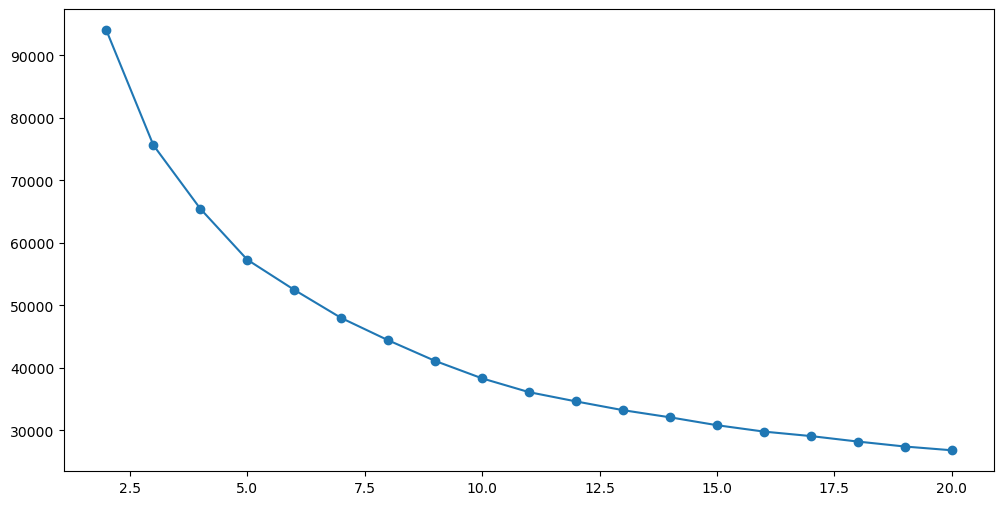

In [69]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

### Segment Distribution

In [70]:
DA_copy_scaled.cluster_5.value_counts()/sum(DA_copy_scaled.cluster_5.value_counts())

cluster_5
1    0.408156
3    0.303575
2    0.151397
0    0.127933
4    0.008939
Name: count, dtype: float64

### 3. Choosing number clusters using Silhouette Coefficient -- SC

**Method of interpretation and validation of consistency within clusters of data**

In [71]:
# calculate SC for K=4
from sklearn import metrics
metrics.silhouette_score( dimensions, km_4.labels_ )

0.24743435093129373

In [72]:
# calculate SC for K=4 
k_range = range(3, 18)
scores = []
for k in k_range:
    km = KMeans(n_clusters = k, random_state = 123)
    km.fit( dimensions )
    scores.append( metrics.silhouette_score(dimensions, km.labels_) )

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

In [73]:
scores

[0.3283845958465899,
 0.24743435093129373,
 0.25905792174123954,
 0.2713534380117768,
 0.26859159370496155,
 0.27077833230368115,
 0.2751341299959461,
 0.2795004038154226,
 0.2693283042689514,
 0.25769153535623723,
 0.26311323257301283,
 0.26249302876622876,
 0.25706012384018967,
 0.2652492398930229,
 0.2664918436505303]

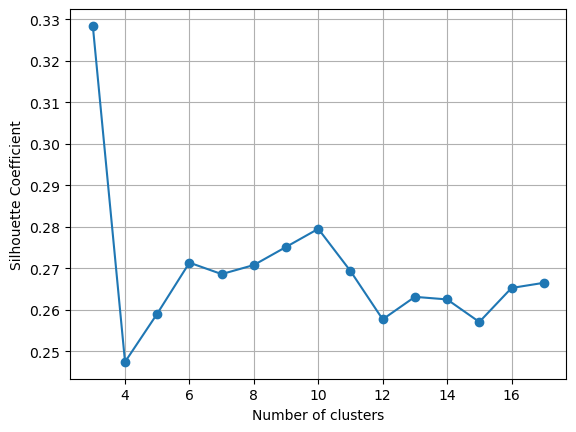

In [74]:
# plot the results
plt.plot(k_range, scores, marker = "o")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### Segment Distribution

In [76]:
DA_copy_scaled.cluster_6.value_counts()/sum(DA_copy_scaled.cluster_6.value_counts())

cluster_6
1    0.378883
4    0.277430
0    0.135196
5    0.127486
2    0.072067
3    0.008939
Name: count, dtype: float64